# The Village

You are not alone. This is fundamental.

In [13]:
!pip install networkx ipycytoscape

You should consider upgrading via the '/Users/anj/Documents/workspace/digipresnet-site/venv/bin/python -m pip install --upgrade pip' command.


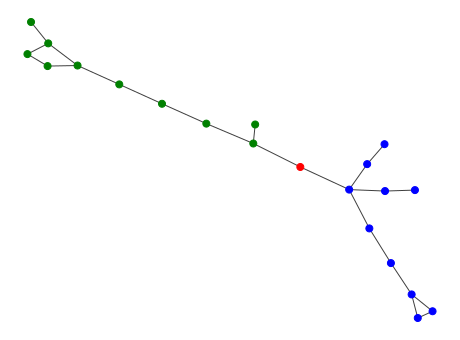

In [72]:
#
# Oh Hello There! 
# 
# This is the Python source code that's used to generate the illustrations for this page. It's just here in case anyone's interested in how the illustrations were created.
#

from ipywidgets import Layout
from networkx import nx
import ipycytoscape
import matplotlib.pyplot as plt

# Generate some random graphs:
def plot_groups(groups=1, node_i=10, link_links=False, link_groups=False, width='100%', height='400px', dynamic=False, faded=False):

    # Accumulate the graph here:
    G = None
    nc = []
    ncf = [] # The 'faded' colour scheme

    # Number of links:
    nlinks = int(node_i/3.0)
    if nlinks == 0 and node_i > 1:
        nlinks = 1

    # Generate multiple groups:
    for loop in range(groups):
        # Generate a connected graph:
        G1 = nx.connected_watts_strogatz_graph(node_i, nlinks, 0.5)
        nx.set_node_attributes(G1, 'them1', "classes")

        # Add the bridge node:
        link_node = node_i
        G1.add_node(link_node, classes='you')

        # Add another connected graph:
        G2 = nx.connected_watts_strogatz_graph(node_i, nlinks, 0.5)
        nx.set_node_attributes(G2, 'them2', "classes")
        G1 = nx.disjoint_union(G1, G2)

        # Link the bridge node to the two graphs:
        G1.add_edge(link_node,link_node - 1)
        G1.add_edge(link_node,link_node + 1)

        # Merge all the Gs
        if G:
            G = nx.disjoint_union(G, G1)
        else:
            G = G1

        # Colour the nodes accordingly:
        nc = nc + ['green']*node_i + ['red'] + ['blue']*node_i
        ncf = ncf + ['gray']*node_i + ['red'] + ['gray']*node_i

    # Nodes in each group:
    group_nodes = 2*node_i + 1

    # Link up the linkers (if requested):
    if link_links:
        for loop in range(groups - 1):
            G.add_edge(loop*group_nodes + node_i, (loop+1)*group_nodes + node_i, classes="digipres")

    # Cross-link the groups as if like finds like (if requested):
    # (only links groups in order, but that makes the result look nice!)
    if link_groups:
        for loop in range(groups - 1):
            # How many links to add
            for sni in range(2):
                # Add 'green-green' link:
                G.add_edge(loop*group_nodes + sni, (loop+1)*group_nodes + sni)
                # Add 'blue-blue' link:
                G.add_edge(loop*group_nodes + node_i + 1 + sni, (loop+1)*group_nodes + node_i + 1 + sni)


    # Initial layout:
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G, k=1.5, iterations=1500)
    
    # Static output using that layout:
    if not dynamic:
        nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.75)
        if faded:
            nx.draw_networkx_nodes(G,pos, node_color=ncf, node_size=50)
        else:
            nx.draw_networkx_nodes(G,pos, node_color=nc, node_size=50)
        plt.axis('off')
        plt.plot()
        return
    else:
        # Layout and plot the graph:
        network_widget = ipycytoscape.CytoscapeWidget(layout=Layout(width=width, height=height, margin='0px auto 0px auto'))
        network_widget.user_zooming_enabled = False
        network_widget.user_panning_enabled = False
        network_widget.graph.add_graph_from_networkx(G)
        network_widget.set_layout(name='cola',
                          nodeSpacing = 5,
                          edgeLengthVal = 50,
                          animate = True,
                          randomize = True, 
                          maxSimulationTime = 1000000)
        network_widget.set_style([
                                {
                                    'selector': 'node.you',
                                    'css': {
                                        'background-color': 'red'
                                    }
                                },
                                {
                                    'selector': 'node.them1',
                                    'css': {
                                        'background-color': 'green'
                                    }
                                },
                                {
                                    'selector': 'node.them2',
                                    'css': {
                                        'background-color': 'blue'
                                    }
                                }
        ])
        if faded:
            network_widget.set_style([
                            {
                                'selector': 'node.you',
                                'css': {
                                    'background-color': 'red',
                                    'height': 60,
                                    'width': 60
                                }
                            },
                            {
                                'selector': 'node.them1',
                                'css': {
                                    'background-color': 'green',
                                    'opacity': 0.25
                                }
                            },
                            {
                                'selector': 'node.them2',
                                'css': {
                                    'background-color': 'blue',
                                    'opacity': 0.25
                                }
                            },
                            {
                                'selector': 'edge',
                                'css': {
                                    'opacity': 0.25
                                }
                            },
                            {
                                'selector': 'edge.digipres',
                                'css': {
                                    'opacity': 1.0,
                                    'width': 15,
                                    'line-color': '#555'
                                }
                            }])

        return network_widget

%config InlineBackend.figure_format = 'svg'

plot_groups(height='300px')

Digital preservation is built on borderlands. On one side, the rapidly evolving _new world_ of modern information technology. On the other, the _ancient land_ of cultural heritage, of libraries and archives.

Your work is to build a bridge between these cultures; to help each understand the other; to find common purpose; to help both sides learn to _build together_. As the go-between, you will learn both languages. You will be the messenger, and we all know the dangers of being the messenger when the news is bad.

Living across two worlds can be hard. So above all else, you must find support, and be supported. Your managers will likely come from one of the two worlds, so may not understand the issues or perceive the risks.  If they can't help you defuse the dangers and fight the loneliness, leave. 

But if you are given the support you need to be able to reach out, you'll find you are not alone.

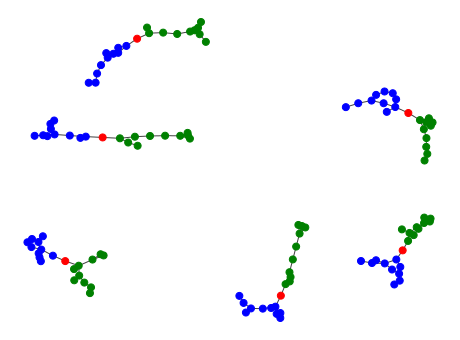

In [73]:
plot_groups(groups=6)

## Kin

Many different organisations now recognise the importance of digital preservation, so while you may work alone or in a small team, there are others in other organisations battling very similar problems.

They are your kin.

They likely operate in different contexts, with different goals and constraints.  But like you, they are go-betweens. They are bridges. They are learning as they go. They are finding common ground. Just like you.

If you can meet these like minds, you can help each other. But you'll have to put in the work.

### Meeting Places

As the [Wikipedia list of digital preservation initiatives](https://en.wikipedia.org/wiki/List_of_digital_preservation_initiatives) shows, there are a _lot_ of potential meeting places.   Here, I'm briefly introduce a handful of those that have helped me on my journey, but this cannot and should not be considered an exaustive list as it is heavily biased by my experiences. One of the things you'll need to work on is researching these organisations, to find out which ones might work for you.


#### Conferences & Coalitions

One of the ways to meet your peers is through the projects and events run by the various national and international organisations that have been set up to facilitate wider collaboration.  

Both the [Digital Preservation Coalition (DPC)](https://www.dpconline.org/) and the U.S. [National Digital Stewardship Alliance (NDSA)](http://www.digitalpreservation.gov/ndsa/) put a lot of work into supporting the digital preservation community.  They are both membership-based organisations, but make a lot of their work openly available.

There are also a number of initiatives supporting specific areas of interest, including:

- The [Open Preservation Foundation](https://openpreservation.org/) with is a strong focus on supporting open source tools used in digital preservation.
- The [International Internet Preservation Consortium](https://netpreserve.org/), focussed on web archiving both as a means and a target of digital preservation.
- The [BitCurator Consortium](https://bitcurator.net/bitcurator-consortium/), supporting the use of open source digital forensics tools for preservation purposes.
- The [Software Heritage](https://www.softwareheritage.org/) initiative in collaboration with [UNESCO](https://en.unesco.org/themes/information-preservation).
- The [No Time To Wait](https://mediaarea.net/NoTimeToWait) conference series, focusing on audiovisual preservation.
- The [Software Sustainability Institute](https://www.software.ac.uk/)

The largest digital preservation conference is [iPres](https://ipres-conference.org/). This is a good place to meet peers, but you should also look out for digital preservation tracks in conferences more closely related to your particular situation.


#### The #digipres Community

Outside of the formal venues, there is a wider community of digital preservation practitioners who are keen to help support each other. 

For those able to work in the open and with a public profile, Twitter is a good option.  I [set up](http://anjackson.github.io/keeping-codes/practice/DigiPresNews.html) [@digipresnews](https://twitter.com/digipresnews) account was set up to ensure important digital preservation blogs have a presence on Twitter, and as such, [the list of @digipresnews followers](https://twitter.com/digipresnews/followers) is a reasonable starting point. Another approach is to wander through the [#digipres](https://twitter.com/search?q=%23digipres) or [#DigitalPreservation](https://twitter.com/search?q=%23DigitalPreservation) hashtag feeds, or start with [this DigiPres Twitter List](https://twitter.com/i/lists/98975653) by [David Underdown](https://twitter.com/DavidUnderdown9).

Alternatively, off social media, there are a number of mailing lists that may help. The [JISC Digital Preservation Mailing List](https://www.jiscmail.ac.uk/cgi-bin/webadmin?A0=DIGITAL-PRESERVATION) is one widely-used option, but as above, there are often more domain-specific lists that might be better depending on the question and the context (e.g. [Research Data Management](https://www.jiscmail.ac.uk/cgi-bin/webadmin?A0=RESEARCH-DATAMAN), [Web Archiving](https://netpreserve.org/about-us/iipc-mailing-list/), [Digital Curation](https://groups.google.com/g/digital-curation), etc.)

Although Twitter and mailing lists are good places to ask questions, it's not always easy to find out if you question has already been answered before, or to improve the answers over time.  This realisation lead to the creation of the [Digital Preservation Questions & Answers](https://qanda.digipres.org/), which was set up by some members of the #digipres community as a place to pool these useful tidbits over time.

As well as these forums, some members of the #digipres community has tried to build a shared information hub in the form of [digipres.org](https://www.digipres.org/).  There are a lot of digital preservation tools and information out there, and [digipres.org](https://www.digipres.org/) attempt to make sure you can find what you need!

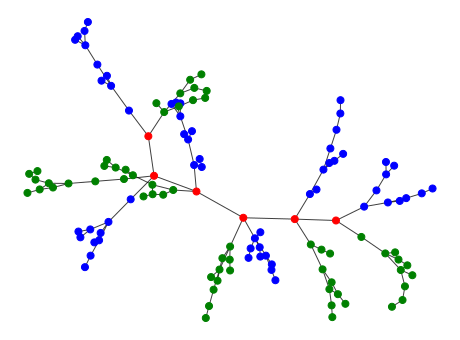

In [74]:
plot_groups(groups=6, link_links=True)

## The Bad News

One of the things library Twitter folks like to ridicule is the endless stream of editorials about ["the future of libraries"](https://www.google.co.uk/search?q=%22the+future+of+libraries%22&tbs=sbd:1,ar:1&tbm=nws&source=lnt&sa=X&biw=2003&bih=1027&dpr=2), usually written by someone who has seen an eBook once but never talked to a librarian.  There's usually little of value in these articles, but I think the fact that they _keep coming back_ does indicate that many still see libraries and archives through the prism of print.

And, to be honest, I think there is some truth to that.  I think libraries and archives have been deeply disrupted by modern information technology, and we're still working through the consequences. I think our institutions have had _decades_ to become heavily optimized for handling print, and the modifications required to handle digital content are not yet fully understood. This problem manifests itself in a number of ways:

### Underfunding 

Digital preservation is underfunded. _Hugely_ underfunded. 

It's certainly not the _only_ problem, by any means. But it _amplifies_ everything, like a microphone too close to the speaker.

The cultural heritage sector has generally seen cuts upon cuts over recent years, rather than any kind of ongoing investment. This has meant organisations structured around preserving physical things straining to create a digital version of themselves, on small money, with and tiny teams.

One of my favourite examples in recent years was ["XFR STN"](https://www.newmuseum.org/exhibitions/view/xfr-stn) (Transfer Station) -- an open-door artist-centred media archiving project -- and this blog post about it: [It Takes a Village to Save a Hard Drive](https://web.archive.org/web/20130916000537/http://notepad.benfinoradin.info/2013/09/12/it-takes-a-village-to-save-a-hard-drive). It perfectly illustrate the amazing potential of this kind of interdisciplinary work, but the `07/17–09/08/2013` dates buried in the FAQ very clearly illustrates the problem.

We do our best to help each other out, but it's important to recognise that this is a kind of coping mechanism -- a consequence of our mistreatment. We can support each other, but must also beware the dangers of [vocational awe](http://www.inthelibrarywiththeleadpipe.org/2018/vocational-awe/).


### Fragmentation

There is _so much_ to be done, all while fighting institutional inertia in order to get _anything_ done. This can leave us feeling undermined and embattled. The _"like minds"_ you find will be able to offer a sympathetic ear, and share their own experiences.  But there's a trap here. Venting shared frustrations brings you closer to those _outside_ your organisation, but can isolate you from those _inside_ it. _Misery loves company_, and it may linger too long.

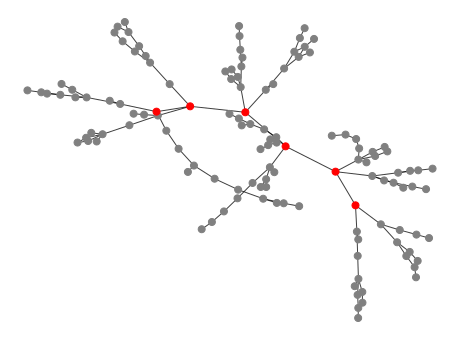

In [75]:
plot_groups(groups=6, link_links=True, faded=True)


Sometimes people end up feeling that only us digital preservation people _get it_. If it's easier and more fun to imagine how things _could_ be than it is to get your institions to take _one more damn step forward_, it's tempting to avoid the conflict. At it's worst, this can lead to immensly ambitious digital preservation ideals that only seem ideal because they will never be blunted by the realities of implementation.[^rirant]

[^rirant]: In the future, this will probably link to something about Representation Information Registries.

### Community Tensions

Digital preservation is part of a [Cambrian Explosion](https://en.wikipedia.org/wiki/Cambrian_explosion) of digital culture. It's everywhere at the same time, but thinly spread.

There's a kind of core _Digital Preservation_ community that focusses on digital preservation as a distinct and singular field of research and practice. But this approach tends to abstract away the context in which preservation is taking place, which makes it harder to collaborate other people who are doing essentially the same thing but under slightly different circumstances.

Even just in and around libraries and archives, there are lots of fields that are in some way 'doing digital preservation', but framing it differently and in somewhat inconsistent terms. These include (but are not limited to):

- Digital curation
- Digital scholarship
- Digital libraries
- Digital repositories
- Digitization
- Research data management
- Web archiving

The lack of consistent terminology can be frustrating, but right now there's no general acceptance that e.g. 'digital preservation' means 'preserving digital things' and does _not_ mean 'preserving things digitally'. To build the alliances we need, it may be better to accept the situation and try to be more explicit depending on the context, rather than demand compliance ahead of consensus.

And that's just our neighbours.

There are many potential allies out there in the wider world, and potential for collaboration on a truly global scale. They may use very different language, but every data standardisation and interoperability group is a potential ally. Anyone who works on interoperabilty, data takeout, open data, information security, resiliance engineering, checklist manifesto, ...


Tension between getting started and building on other's work.

## Making Connections

the idea of cross-linking individuals in similar roles across organisation, building a more resiliant mesh...  Internal joining up, storage, IT, security, etc.

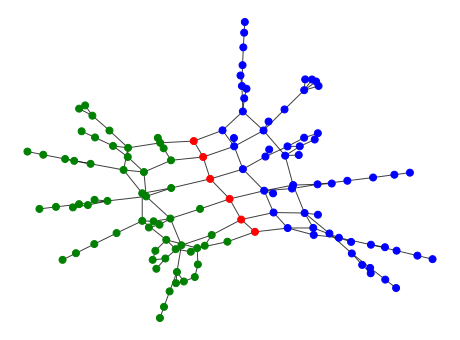

In [76]:
plot_groups(groups=6, link_links=True, link_groups=True)

What gets saved will be what we choose to save, together.

We are not alone. This is fundemental.